In [33]:
%pip install matplotlib -y

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE, Isomap
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


Usage:   
  /opt/anaconda3/bin/python -m pip install [options] <requirement specifier> [package-index-options] ...
  /opt/anaconda3/bin/python -m pip install [options] -r <requirements file> [package-index-options] ...
  /opt/anaconda3/bin/python -m pip install [options] [-e] <vcs project url> ...
  /opt/anaconda3/bin/python -m pip install [options] [-e] <local project path> ...
  /opt/anaconda3/bin/python -m pip install [options] <archive url/path> ...

no such option: -y
Note: you may need to restart the kernel to use updated packages.


# 9회차 과제
목표: 차원 축소 수행하기.  
(수업 자료의 `과제 연계 실습` 참고)

## t-SNE와 Isomap의 비교

다음은 와인과 관련한 여러 정보와 구분이 담긴 데이터이다.

In [3]:
raw = datasets.load_wine()

wine = pd.DataFrame(data=raw.data, columns=raw.feature_names)
wine["label"] = raw.target 

compact_columns_names = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline', 'label']
wine = wine[compact_columns_names]

display(wine)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.53,1.46,9.30,0.60,1.62,840.0,2


먼저, 특성(X)과 구분(y)을 분리한 후 정규화하시오.

In [13]:
X = wine[['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline', 'label']]
y = wine['label']

# Feature Scaling
scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)

t-SNE를 사용하여 2차원 데이터로 변환한 후, target 값에 따라 색을 달리하여 산점도를 그리시오.

,first feature,second feature
0,10.662707,7.973887
1,8.919727,5.520372
2,12.802307,3.033738
3,13.299626,6.046530
4,9.233017,0.695971
...,...,...
173,-13.093932,-3.199049
174,-14.290833,-3.178757
175,-15.177598,-3.001033
176,-15.130956,-3.634468


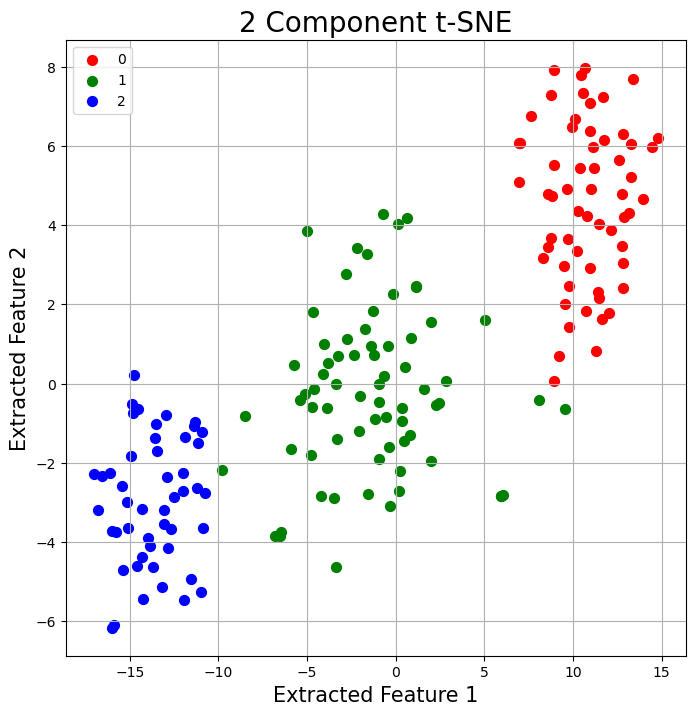

In [15]:
tSNE_2d = TSNE(n_components=2)
ts_2d = tSNE_2d.fit_transform(X_scaled)
tdf_2d = pd.DataFrame(data=ts_2d, columns = ['first feature', 'second feature'])
display(tdf_2d)

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Extracted Feature 1', fontsize = 15)
ax.set_ylabel('Extracted Feature 2', fontsize = 15)
ax.set_title('2 Component t-SNE', fontsize=20)

targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = y == target
    ax.scatter(tdf_2d.loc[indicesToKeep, 'first feature']
               , tdf_2d.loc[indicesToKeep, 'second feature']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()

이번에는 Isomap을 사용하여 2차원 데이터로 변환한 후, target 값에 따라 색을 달리하여 산점도를 그리시오.

,first feature,second feature
0,-6.987706,-1.418770
1,-4.539979,-0.598162
2,-6.402662,-1.392510
3,-7.650409,-3.174150
4,-3.567857,-3.714431
...,...,...
173,7.098351,-0.488415
174,6.384659,-1.726339
175,8.309167,-0.975281
176,8.196060,-0.679973


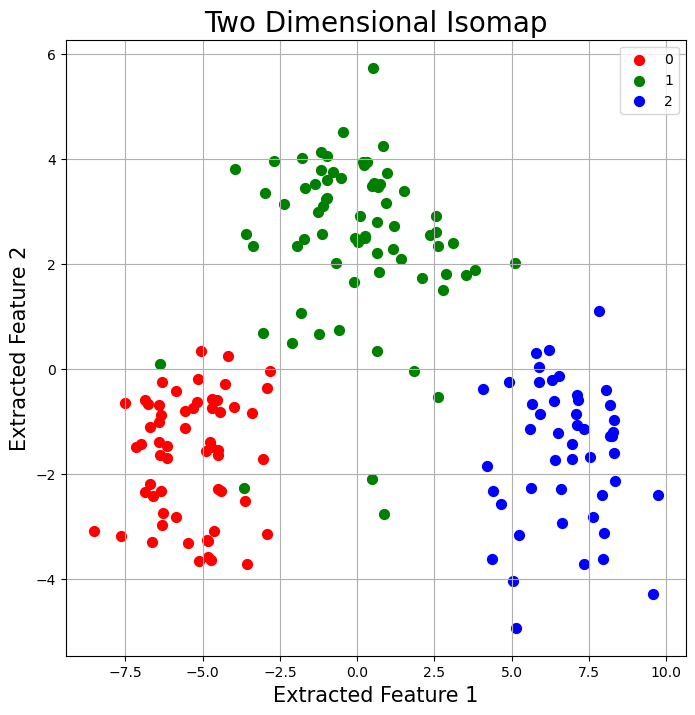

In [17]:
isomap_2d = Isomap(n_components=2, n_neighbors=12)
iss_2d = isomap_2d.fit_transform(X_scaled)

isf_2d = pd.DataFrame(data=iss_2d, columns = ['first feature', 'second feature'])
display(isf_2d)
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Extracted Feature 1', fontsize = 15)
ax.set_ylabel('Extracted Feature 2', fontsize = 15)
ax.set_title('Two Dimensional Isomap', fontsize = 20)

targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = y == target
    ax.scatter(isf_2d.loc[indicesToKeep, 'first feature']
               , isf_2d.loc[indicesToKeep, 'second feature']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()

어떤 방식이 이 데이터셋에 더 적합한지(즉, 어떤 방식으로 변환해야 더 쉽게 분류할 수 있을지) 논하시오.

산점도를 이용하여 어떤 방법이 더 적합한지 생각할떄, 2차원으로 축소할때 t-SNE의 방법이 조금더 명확하게 차별화가 되어있는것을 볼수있다. 그러므로 t-SNE가 더 적합하다. 

또한, 지금까지 배운 분류기 중 하나를 사용하여, 본 데이터를 3차원으로 축소해도 괜찮은지 논하시오.

[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

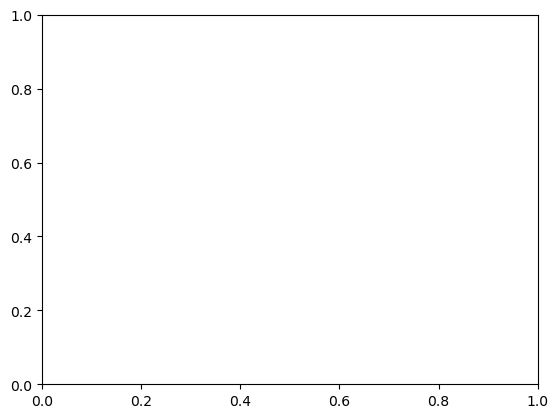

In [35]:


scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)

pca_3d = PCA(n_components=3)
pcs_3d = pca_3d.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=0)

classifier = xgb.XGBClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
xgb.plot_tree(classifier)
xgb.plot_importance(classifier, importance_type='weight')
xgb.plot_importance(classifier, importance_type='gain')
xgb.plot_importance(classifier, importance_type='cover')



답: (코드를 작성하여 실험한 뒤 그 결과를 근거로 논할 것.)